In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.ticker as ticker
import datetime as datetime
import requests
import json
import time

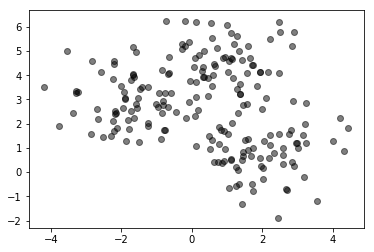

In [14]:
N = 200
k = 3
X, y = make_blobs(n_samples=N, n_features=2,
                  centers=k, random_state=0)
plt.scatter(X[:,0], X[:,1], color='k', alpha=0.5, edgecolor='k')
plt.show()

In [6]:
def assign(distance, closest, X, u_t, k):
    for j in range(k):
        distance[:,j] = np.sqrt((X[:,0] - u_t[j][0])**2 + (X[:,1] - u_t[j][1])**2)
    for i in range(len(X)):
        closest[i] = np.argmin(distance[i,])

def update(distance, closest, u_t, k):
    for i in range(k):
        x = X[closest == i, 0]
        y = X[closest == i, 1]
        if x.size > 0 and y.size > 0:
            u_t[i][0] = np.mean(x)
            u_t[i][1] = np.mean(y)
            
def KMEANS(X, k, show=False):
    distance = np.zeros(shape=(len(X),k))
    closest = np.zeros(len(X))
    u_t = X[np.random.choice(N, k)]
    while True:
        closest_c = np.copy(closest)
        update(distance, closest, u_t, k)
        assign(distance, closest, X, u_t, k)
        if np.array_equal(closest_c, closest):
            break
    if show:
        colmap = ['r','g','b']
        colors = [colmap[int(i)] for i in closest]
        plt.scatter(X[:,0], X[:,1], color=colors, alpha=0.5, edgecolor='k')
        for i in range(k):
            plt.scatter(u_t[i][0], u_t[i][1], color=colmap[i]) 
        plt.show()
    return closest

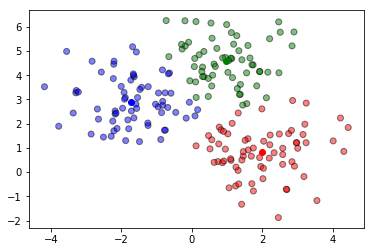

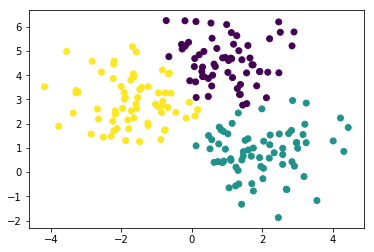

In [7]:
from sklearn.cluster import KMeans
KMEANS(X, k, show=True)
a = KMeans(n_clusters=3, random_state=0).fit_predict(X)
plt.clf()
plt.scatter(X[:,0],X[:,1], c=a)

In [36]:
start_time = time.time() - 48*60*60
resource = requests.get("https://poloniex.com/public?command=returnChartData&currencyPair=BTC_ETH&start=%s&end=9999999999&period=1800" % start_time)
data = json.loads(resource.text)

quotes = {}
quotes['open']=np.asarray([item['open'] for item in data])
quotes['close']=np.asarray([item['close'] for item in data])
quotes['high']=np.asarray([item['high'] for item in data])
quotes['low']=np.asarray([item['low'] for item in data])
xdate=[datetime.datetime.fromtimestamp(item['date']) for item in data]

In [27]:
xdate

[datetime.datetime(2020, 4, 3, 18, 42, 24),
 datetime.datetime(2020, 4, 3, 19, 0),
 datetime.datetime(2020, 4, 3, 19, 30),
 datetime.datetime(2020, 4, 3, 20, 0),
 datetime.datetime(2020, 4, 3, 20, 30),
 datetime.datetime(2020, 4, 3, 21, 0),
 datetime.datetime(2020, 4, 3, 21, 30),
 datetime.datetime(2020, 4, 3, 22, 0),
 datetime.datetime(2020, 4, 3, 22, 30),
 datetime.datetime(2020, 4, 3, 23, 0),
 datetime.datetime(2020, 4, 3, 23, 30),
 datetime.datetime(2020, 4, 4, 0, 0),
 datetime.datetime(2020, 4, 4, 0, 30),
 datetime.datetime(2020, 4, 4, 1, 0),
 datetime.datetime(2020, 4, 4, 1, 30),
 datetime.datetime(2020, 4, 4, 2, 0),
 datetime.datetime(2020, 4, 4, 2, 30),
 datetime.datetime(2020, 4, 4, 3, 0),
 datetime.datetime(2020, 4, 4, 3, 30),
 datetime.datetime(2020, 4, 4, 4, 0),
 datetime.datetime(2020, 4, 4, 4, 30),
 datetime.datetime(2020, 4, 4, 5, 0),
 datetime.datetime(2020, 4, 4, 5, 30),
 datetime.datetime(2020, 4, 4, 6, 0),
 datetime.datetime(2020, 4, 4, 6, 30),
 datetime.datetime(202

In [40]:
X = np.asarray([[time.mktime(xdate[i].timetuple()), quotes['close'][i]] for i in range(len(xdate)) ])

In [41]:
X


array([[1.58591803e+09, 2.09399700e-02],
       [1.58591880e+09, 2.08772200e-02],
       [1.58592060e+09, 2.09479200e-02],
       [1.58592240e+09, 2.09400000e-02],
       [1.58592420e+09, 2.08869700e-02],
       [1.58592600e+09, 2.10491700e-02],
       [1.58592780e+09, 2.10480500e-02],
       [1.58592960e+09, 2.08569700e-02],
       [1.58593140e+09, 2.08740000e-02],
       [1.58593320e+09, 2.08981600e-02],
       [1.58593500e+09, 2.09483200e-02],
       [1.58593680e+09, 2.09683900e-02],
       [1.58593860e+09, 2.09919900e-02],
       [1.58594040e+09, 2.09720600e-02],
       [1.58594220e+09, 2.10160400e-02],
       [1.58594400e+09, 2.09865000e-02],
       [1.58594580e+09, 2.09940100e-02],
       [1.58594760e+09, 2.09768300e-02],
       [1.58594940e+09, 2.09708100e-02],
       [1.58595120e+09, 2.09437000e-02],
       [1.58595300e+09, 2.09522800e-02],
       [1.58595480e+09, 2.09610600e-02],
       [1.58595660e+09, 2.09789400e-02],
       [1.58595840e+09, 2.09554000e-02],
       [1.585960

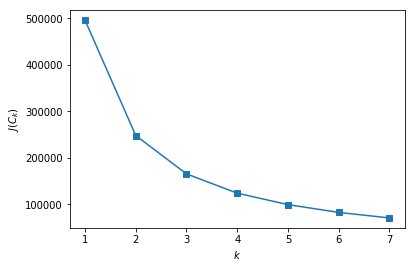

In [42]:
# используем пакет sklearn
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 8), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

In [ ]:
def la(data, p, second_order=True, eps=1e-5):
    Xi = 3 * (p + 1)
    X = data[np.arange(p) + np.arange(len(data) - p)[:, None]]
    omega = np.argpartition(np.sum(np.power(X - data[-p:], 2), axis=1), Xi)[:Xi]
    if not second_order:
        Y = np.hstack((np.ones(Xi)[:, None], X[omega]))
    else:
        idx = np.arange(p)[:, None] - np.arange(p) <= 0
        Y = np.hstack((np.ones(Xi)[:, None], (X[omega, :, None] * X[omega, None, :])[:, idx]))
    params = np.linalg.solve(Y.T @ Y + eps * np.eye(Y.shape[1]), Y.T @ data[omega + p])
    if not second_order:
        return params, np.sum(params * np.hstack([1, data[-p:]]))
    else:
        return params, np.sum(params * np.hstack([1, (data[-p:, None] * data[-p:])[idx]]))